In [1]:
import os
import glob
import pandas as pd
import pandasql
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple 

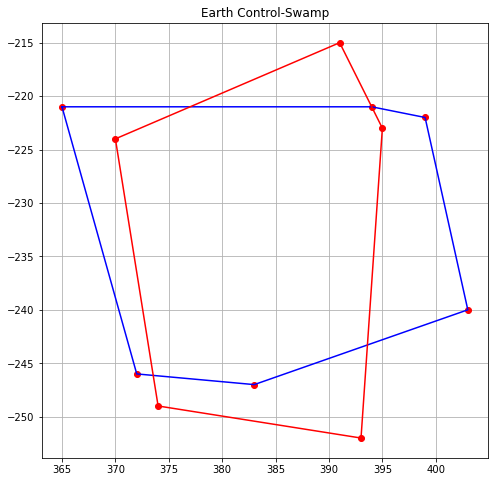

In [12]:
#Compare the convex hulls of TWO users
fig, ax = plt.subplots(figsize=(8, 8))

chull_x_values = []
chull_z_values = []
i = 45
gt = 25

###### plot for User convex hull #######
for j in range (0, len(chull_list[i])):
    ax.plot(chull_list[i][j].x,chull_list[i][j].z, 'ro', linestyle='None')
    chull_x_values.append(chull_list[i][j].x)
    chull_z_values.append(chull_list[i][j].z)
    
#add starting point and plot the convex hull polygon
chull_x_values.append(chull_list[i][0].x)
chull_z_values.append(chull_list[i][0].z)
ax.plot(chull_x_values, chull_z_values, color='blue')

###### plot for convex hull of ground truth #######
chull_x_values = []
chull_z_values = []

for j in range (0, len(chull_list[gt])):
    ax.plot(chull_list[gt][j].x,chull_list[gt][j].z, 'ro', linestyle='None')
    chull_x_values.append(chull_list[gt][j].x)
    chull_z_values.append(chull_list[gt][j].z)
    
#add starting point and plot the convex hull polygon
chull_x_values.append(chull_list[gt][0].x)
chull_z_values.append(chull_list[gt][0].z)
ax.plot(chull_x_values, chull_z_values, color='red')


ax.set_title('Earth Control-Swamp')
ax.grid(True)

In [13]:
#Area of a convex polygon
#Area = 1/2 |(x1y2 - x2y1)+(x2y3-x3y2) + ... + (xny1-x1yn)|

def Area_chull(hull):
    Area = 0
    for j in range (0, len(hull)):
        if (j == len(hull)-1):
            Area = Area + (((hull[j].x)*(hull[0].z))-((hull[0].x)*(hull[j].z)))
        else:
            Area = Area + (((hull[j].x)*(hull[j+1].z))-((hull[j+1].x)*(hull[j].z)))

    Area = 0.5 * abs(Area)
    return Area

i = 45
gt = 25

AreaC1 = Area_chull(chull_list[i])
AreaC2 = Area_chull(chull_list[gt])

print ('Area C1 = ')
print (AreaC1)
print ('Area C2 = ')
print (AreaC2)

Area C1 = 
775.5
Area C2 = 
695.0


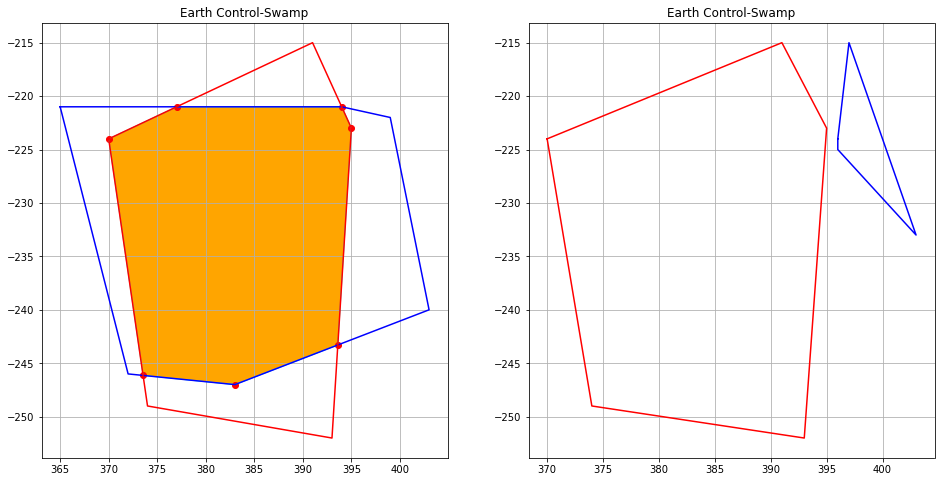

In [14]:
#Intersection of two Convex polygons consists of two vertices
#a) the intersection points of edges of the two convex polygons and 
#b) the vertices of the polygon which are located inside the other convex polygon

def get_intersection(poly1, poly2):
    int_points = []
    for j in range (0, len(poly1)): 
        nextj = (j+1) % len(poly1)
        if ((poly1[j].x==poly1[nextj].x)and(poly1[j].z==poly1[nextj].z)):
            continue
        if ((poly1[j].x==poly1[nextj].x)):
            slope1 = -1
            a1 = 1
            b1 = 0
            c1 = -(poly1[j].x)
        else:
            slope1 = (poly1[nextj].z - poly1[j].z)/(poly1[nextj].x - poly1[j].x)
            a1 = slope1
            b1 = -1
            c1 = -((slope1*poly1[j].x)-(poly1[j].z))
        
        for k in range (0, len(poly2)): 
            nextk = (k+1) % len(poly2)
            if ((poly2[k].x==poly2[nextk].x)and(poly2[k].z==poly2[nextk].z)):
                continue
            if ((poly2[k].x==poly2[nextk].x)):
                slope2 = -1
                a2 = 1
                b2 = 0
                c2 = -(poly2[k].x)
            else:
                slope2 = (poly2[nextk].z - poly2[k].z)/(poly2[nextk].x - poly2[k].x)
                a2 = slope2
                b2 = -1
                c2 = -((slope2*poly2[k].x)-(poly2[k].z))
        
            if (slope1 == slope2)and((poly1[j].x==poly2[k].x)and(poly1[j].z==poly2[k].z)):
                xz_int = []
                xz_int.append(poly1[j].x)
                xz_int.append(poly1[j].z)
                int_points.append(xz_int)
            if (slope1 != slope2):  #not parallel lines 
                x_int = ((b1*c2)-(b2*c1))/((a1*b2)-(a2*b1))
                z_int = ((c1*a2)-(c2*a1))/((a1*b2)-(a2*b1))
            
                if (((min(poly1[j].x, poly1[nextj].x)<= x_int)and(max(poly1[j].x, poly1[nextj].x)>= x_int)
                    and(min(poly1[j].z, poly1[nextj].z)<= z_int)and(max(poly1[j].z, poly1[nextj].z)>= z_int))
                    and((min(poly2[k].x, poly2[nextk].x)<= x_int)and(max(poly2[k].x, poly2[nextk].x)>= x_int)
                    and(min(poly2[k].z, poly2[nextk].z)<= z_int)and(max(poly2[k].z, poly2[nextk].z)>= z_int))): 
                    xz_int = []
                    xz_int.append(x_int)
                    xz_int.append(z_int)
                    int_points.append(xz_int)
            
    #print (int_points)    
    return int_points

def get_insidepoints(poly1, poly2):
    inside_points = []
    for j in range (0, len(poly1)):
        intersection_count = 0
        intersection_temp = []
        for k in range (0, len(poly2)):
            nextk = (k+1) % len(poly2)

            if ((poly2[k].x==poly2[nextk].x)and(poly2[k].z==poly2[nextk].z)):
                continue
            if ((poly2[k].x==poly2[nextk].x)):
                slope2 = -1
                a2 = 1
                b2 = 0
                c2 = -(poly2[k].x)
            else:
                slope2 = (poly2[nextk].z - poly2[k].z)/(poly2[nextk].x - poly2[k].x)
                a2 = slope2
                b2 = -1
                c2 = -((slope2*poly2[k].x)-(poly2[k].z))
            if (slope2==0):
                continue
            x_int = -((b2*poly1[j].z)+c2)/a2
            z_int = poly1[j].z

            if ((poly1[j].x <= x_int)
                and((min(poly2[k].x, poly2[nextk].x)<= x_int)and(max(poly2[k].x, poly2[nextk].x)>= x_int)
                and(min(poly2[k].z, poly2[nextk].z)<= z_int)and(max(poly2[k].z, poly2[nextk].z)>= z_int))): 
                is_inlist = 0
                for i in range (0, len(intersection_temp)):
                    temp_x = round (intersection_temp[i][0],5)
                    temp_z = round (intersection_temp[i][1],5)
                    if (temp_x==round(x_int,5))and(temp_z==round(z_int,5)):
                    #if (intersection_temp[i][0]==x_int)and(intersection_temp[i][1]==z_int):
                        is_inlist = 1
                        continue
                if is_inlist == 0:
                    int_point = []
                    int_point.append(x_int)
                    int_point.append(z_int)
                    intersection_temp.append(int_point)
                    intersection_count = intersection_count + 1
                    
        if (poly1[j].x >= poly2[Left_index(poly2)].x)and(intersection_count%2==1): 
            xz_int = []
            xz_int.append(poly1[j].x)
            xz_int.append(poly1[j].z)
            inside_points.append(xz_int)
            
    return inside_points

poly1 = chull_list[45]
poly2 = chull_list[12]
poly3 = chull_list[25]

intersection = []
insidepoints = []
intersection = get_intersection (poly1, poly3)
insidepoints1 = get_insidepoints (poly1, poly3)
insidepoints2 = get_insidepoints (poly3, poly1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    
intersection_points = []
intersection_poly = []

for j in range (0, len(intersection)):
    intersection_points.append (Point(chull_list[i][0].username,intersection[j][0],intersection[j][1]))

for j in range (0, len(insidepoints1)):
    intersection_points.append (Point(chull_list[i][0].username,insidepoints1[j][0],insidepoints1[j][1]))

for j in range (0, len(insidepoints2)):
    intersection_points.append (Point(chull_list[i][0].username,insidepoints2[j][0],insidepoints2[j][1]))

if len(intersection_points) >= 3:
    intersection_poly = convexHull(intersection_points)
    #print ('intersection polygon')
    #print (intersection_poly)
    len_poly = len(intersection_poly)
    intpoly_x_values = []
    intpoly_z_values = []
    for i in range (0, len_poly):
        ax[0].plot(intersection_poly[i].x,intersection_poly[i].z, 'ro', linestyle='None')
        intpoly_x_values.append(intersection_poly[i].x)
        intpoly_z_values.append(intersection_poly[i].z)

    #add starting point and plot the convex hull polygon
    intpoly_x_values.append(intersection_poly[0].x)
    intpoly_z_values.append(intersection_poly[0].z)
    ax[0].plot(intpoly_x_values, intpoly_z_values, linestyle='solid', linewidth=1, color='cyan')
    ax[0].fill(intpoly_x_values, intpoly_z_values, "orange") 
    

intersection = []
insidepoints = []
intersection = get_intersection (poly2, poly3)
insidepoints1 = get_insidepoints (poly2, poly3)
insidepoints2 = get_insidepoints (poly3, poly2)
    
intersection_points = []
intersection_poly1 = []

for j in range (0, len(intersection)):
    intersection_points.append (Point(chull_list[i][0].username,intersection[j][0],intersection[j][1]))

for j in range (0, len(insidepoints1)):
    intersection_points.append (Point(chull_list[i][0].username,insidepoints1[j][0],insidepoints1[j][1]))

for j in range (0, len(insidepoints2)):
    intersection_points.append (Point(chull_list[i][0].username,insidepoints2[j][0],insidepoints2[j][1]))

if len(intersection_points) >= 3:
    intersection_poly1 = convexHull(intersection_points)
    #print ('intersection polygon')
    #print (intersection_poly)
    len_poly = len(intersection_poly1)
    intpoly_x_values = []
    intpoly_z_values = []
    for i in range (0, len_poly):
        ax[1].plot(intersection_poly1[i].x,intersection_poly1[i].z, 'ro', linestyle='None')
        intpoly_x_values.append(intersection_poly1[i].x)
        intpoly_z_values.append(intersection_poly1[i].z)

    #add starting point and plot the convex hull polygon
    intpoly_x_values.append(intersection_poly1[0].x)
    intpoly_z_values.append(intersection_poly1[0].z)
    ax[1].plot(intpoly_x_values, intpoly_z_values, linestyle='solid', linewidth=1, color='cyan')
    ax[1].fill(intpoly_x_values, intpoly_z_values, "orange")

###### plot for User1 convex hull #######
chull_x_values = []
chull_z_values = []
for j in range (0, len(poly1)):
    #ax.plot(poly1[j].x,poly1[j].z, 'ro', linestyle='None')
    chull_x_values.append(poly1[j].x)
    chull_z_values.append(poly1[j].z)
    
#add starting point and plot the convex hull polygon
chull_x_values.append(poly1[0].x)
chull_z_values.append(poly1[0].z)
ax[0].plot(chull_x_values, chull_z_values, color='blue')

###### plot for User2 convex hull #######
chull_x_values = []
chull_z_values = []
for j in range (0, len(poly2)):
    #ax.plot(poly1[j].x,poly1[j].z, 'ro', linestyle='None')
    chull_x_values.append(poly2[j].x)
    chull_z_values.append(poly2[j].z)
    
#add starting point and plot the convex hull polygon
chull_x_values.append(poly2[0].x)
chull_z_values.append(poly2[0].z)
ax[1].plot(chull_x_values, chull_z_values, color='blue')

###### plot for convex hull of ground truth #######
chull_x_values = []
chull_z_values = []

for j in range (0, len(poly3)):
    #ax.plot(poly2[j].x,poly2[j].z, 'ro', linestyle='None')
    chull_x_values.append(poly3[j].x)
    chull_z_values.append(poly3[j].z)
    
#add starting point and plot the convex hull polygon
chull_x_values.append(poly3[0].x)
chull_z_values.append(poly3[0].z)
ax[0].plot(chull_x_values, chull_z_values, color='red')
ax[1].plot(chull_x_values, chull_z_values, color='red')


ax[0].set_title('Earth Control-Swamp')
ax[0].grid(True)

ax[1].set_title('Earth Control-Swamp')
ax[1].grid(True)

    

#Intersection over Union



In [15]:
#Intersection over union
#Intersection over union = Area of Intersection/Area of Union
'''
Area(Q1+Q2) = Area(Q1) + Area(Q2) - Area(Q1*Q2)
IoU = Area(Q1*Q2) / Area(Q1+Q2)
'+' means union;
'*' means intersection.
'''
AreaC1 = Area_chull(poly1)
AreaC2 = Area_chull(poly3)
Area_Intersection = Area_chull(intersection_poly)
Area_Union = AreaC1 + AreaC2 - Area_Intersection
IoU = Area_Intersection / Area_Union
print ('IOU of Poly1 and Poly3')
print (IoU)

IOU of Poly1 and Poly3
0.6029351919357911


In [16]:
AreaC1 = Area_chull(poly2)
AreaC2 = Area_chull(poly3)
Area_Intersection = Area_chull(intersection_poly1)
Area_Union = AreaC1 + AreaC2 - Area_Intersection
IoU = Area_Intersection / Area_Union
print ('IOU of Poly2 and Poly3')
print (IoU)

IOU of Poly2 and Poly3
0.0
